In [346]:
import urllib.request
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import re
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
%matplotlib inline
import json
import requests
# import geopandas as gpd
# import fiona
# from shapely.geometry import Point
from IPython import display
# from mpl_toolkits.axes_grid1 import make_axes_locatable

In [347]:
seasonum={
    0:"winter",
    1:"spring",
    2:"summer",
    3:"authumn"
}

In [348]:
eq_req=ul.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")

eq_res = ul.request.urlopen(eq_req)

eq_txt = eq_res.read()

eq_soup = bs4(eq_txt, 'html.parser')

In [349]:
eq_soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from Jul

In [350]:
eq_soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

<table class="sortable wikitable">

In [351]:
eq_soup.title.name

'title'

In [352]:
eq_soup.title.string

'List of deadly earthquakes since 1900 - Wikipedia'

In [353]:
eq_soup.title.parent.name

'head'

In [354]:
eq_soup.p

<p>The following list compiles known <a class="mw-redirect" href="/wiki/Earthquakes" title="Earthquakes">earthquakes</a> that have caused one or more <a href="/wiki/Death" title="Death">fatalities</a> since 1900. The list incorporates high quality earthquake source (i.e., origin time, <a href="/wiki/Earthquake_location" title="Earthquake location">location</a> and <a class="mw-redirect" href="/wiki/Earthquake_magnitude" title="Earthquake magnitude">earthquake magnitude</a>) and <a href="/wiki/Death" title="Death">fatality</a> information from several sources.</p>

In [355]:
eq_soup.a

<a id="top"></a>

In [356]:
eq_wkt=eq_soup.find("table", class_="sortable wikitable")

In [357]:
eq_wkt

<table class="sortable wikitable">
<tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths</th>
</tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a class="mw-redirect" href="/wiki/Seismic_scale#Mjma" title="Seismic scale"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td

In [358]:
eq_wkr=eq_wkt.find_all('tr')

# eq_wkr

In [359]:
eq_wkrow=[]
for row in eq_wkr:
    cells = row.find_all('td')
    cells = [ele.text.strip() for ele in cells]
    eq_wkrow.append(cells)

In [360]:
eq_wkhd=[]
# for hd in eq_wkt:
heads=eq_wkt.find_all('th')
heads

heads=[ele.text.strip() for ele in heads]
print(heads)
#     eq_wkhd.append(heads)
#     eq_hd=pd.DataFrame(eq_wkhd)
#     print(eq_hd)
    

['Origin (UTC)', 'Present-day country and link to Wikipedia article', 'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']


In [361]:
eq_df = pd.DataFrame(eq_wkrow)
eq_df.columns=['origin','country','lat','long','depth_km','magnitude','sec_effects','shaking_death','pde_total','utsu_total','em_total','other_deaths']

eq_df=eq_df.drop(0,0)
def eq_reg(eq_col, reg_phrase):
    eq_df[eq_col] = eq_df[eq_col].str.replace(reg_phrase, '')
eq_reg('magnitude', '([a-zA-Z])')
eq_reg('magnitude','\[..\]')
eq_reg('other_deaths', '\[..\]')
eq_reg('country', '\([^\)]*\)*')
eq_reg('country', '\,[^\)]*\)*')  # Added by Massih to clean data in row 1260
eq_reg('other_deaths', '\([^\)]*\)*')
eq_reg('other_deaths', '\+')
eq_reg('em_total', '\[.\].')
eq_reg('other_deaths','\[\d*\]')# added by Massih to clean the data in row 67
eq_reg('other_deaths','\s\d*')# added by Massih to clean the data in row 1207
eq_reg('other_deaths','\*')# added by Massih to clean the data in row 1239
eq_reg('other_deaths','\,')# added by Massih to clean the data in row 1328 & 1329

eq_df[1250:1260]

,origin,country,lat,long,depth_km,magnitude,sec_effects,shaking_death,pde_total,utsu_total,em_total,other_deaths
1251,2005-07-05 16:53,South Africa,-26.468,27.435,5,2.7,,0,1,,,
1252,2005-07-25 15:43,China,46.884,125.030,43.3,5.0,,1,1,,,
1253,2005-09-26 01:55,Peru,-5.721,-76.414,120.9,7.5,,5,5,,5,
1254,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351,87351,,73338,
1255,2005-10-15 04:24,Pakistan,33.977,73.929,11.6,5.2,,2,2,,,
1256,2005-10-20 21:40,Turkey,38.158,26.753,7.7,5.8,,0,1,,,
1257,2005-10-27 11:18,China,23.604,107.798,10,4.2,,1,1,,,
1258,2005-11-08 07:54,Vietnam,9.973,108.226,14.7,5.3,,1,1,,,
1259,2005-11-26 00:49,China,29.714,115.663,10.5,5.2,,16,16,,,
1260,2005-11-27 10:22,Iran,26.786,55.833,18.4,5.9,,13,13,,13,


In [362]:
eq_df['pde_total'] = pd.to_numeric(eq_df['pde_total'], errors='coerce')
eq_df['utsu_total'] = pd.to_numeric(eq_df['utsu_total'], errors='coerce')
eq_df['em_total'] = pd.to_numeric(eq_df['em_total'], errors='coerce')
eq_df['other_deaths'] = pd.to_numeric(eq_df['other_deaths'], errors='coerce')
eq_df['lat'] = pd.to_numeric(eq_df['lat'], errors='coerce')
eq_df['long'] = pd.to_numeric(eq_df['long'], errors='coerce')
eq_df['shaking_death'] = pd.to_numeric(eq_df['shaking_death'], errors='coerce')
eq_df['shaking_death'].replace(np.NAN,0)
eq_df['magnitude'] = pd.to_numeric(eq_df['magnitude'], errors='coerce')



eq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1325 non-null float64
long             1325 non-null float64
depth_km         1340 non-null object
magnitude        1339 non-null float64
sec_effects      1340 non-null object
shaking_death    739 non-null float64
pde_total        750 non-null float64
utsu_total       1027 non-null float64
em_total         560 non-null float64
other_deaths     37 non-null float64
dtypes: float64(8), object(4)
memory usage: 136.1+ KB


In [363]:
eq_df['deaths'] = eq_df[['pde_total','utsu_total','em_total','other_deaths']].max(axis=1)

In [364]:
eq_df['country']=eq_df['country'].str.strip() #removing extra spaces we missed before

eq_df_grp=eq_df.groupby(by='country').count() #frequency of earthquake by country

eq_df_1C=eq_df_grp.drop(['lat','long','depth_km', 'magnitude', 'sec_effects',
       'shaking_death', 'pde_total', 'utsu_total', 'em_total', 'other_deaths','deaths'],1) #drop extra columns

eq_df_1C.columns=['quakes']

In [365]:
# eq_df_1C.sort_values (by='quakes',ascending=False).head(10)

In [366]:
eq_sd=eq_df.drop(['depth_km', 'sec_effects', 'pde_total', 'utsu_total', 'em_total', 'other_deaths'],1)
eq_sd.tail(3)

,origin,country,lat,long,magnitude,shaking_death,deaths
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0


In [367]:
yr=[]
mn=[]
xt=[]

#pulling out numerical values for year, month, and day from first column

for i in range(eq_sd.shape[0]):
    x=i
    datim=eq_sd.iloc[i,0].split('-')
    yr.append(datim[0])
    mn.append(datim[1])
    xt.append(datim[2]) #the time is attached to day, will be cleaned in next block

eq_sd['year']=pd.to_numeric(yr)
eq_sd['month']=pd.to_numeric(mn)
eq_sd['xt']=xt

In [368]:
hr=[]

# the hour is pulled out only from those that contain time data, otherwise replaced with NaN

for i in range(eq_sd.shape[0]):
    if eq_sd.iloc[i,9].find(':') != -1:
        st=eq_sd.iloc[i,9].index(' ')+1
        ed=eq_sd.iloc[i,9].index(':')
        ti=eq_sd.iloc[i,9][st:ed]
        hr.append(ti)
    else:
        ti=np.NaN
        hr.append(ti)

        
eq_sd=eq_sd.drop('xt',1) #The junk column is no longer needed

In [369]:
# grouping date by decades
eq_sd['decade']=10*(eq_sd['year']//10)

#the addition converts UTC to local time, extra 24h will be stripped off (approx.)
eq_sd['hour']=(pd.to_numeric(hr) + (eq_sd['long']//15))%24  

# converting date into season
# the extra adding flips seasons for southern hemisphere
eq_sd['season']=(((eq_sd['month']%12)//3)+(1-np.sign(eq_sd['lat'])))%4

In [370]:
sn=[]

for i in range(len(eq_sd)):
    if eq_sd.iloc[i,11] in [0,1,2,3]:
        x = seasonum[eq_sd.iloc[i,11]]
        sn.append(x)

    else:
        sn.append('unknown')

eq_sd['Season']=sn
eq_sd=eq_sd.drop('season',1) #The numerical season is no longer needed    

In [371]:
sp=[]

# This block flags LOCAL times between 9 PM and 6 AM as SLEEP

for i in range(eq_sd.shape[0]):
    if 6 < eq_sd.iloc[i,10] <21:
        sp.append(False)
    else:
        sp.append(True)
eq_sd['sleep']=sp

In [372]:
mg=[]

# This block assigns a grade to the earthquake based on magnitute
# ref: http://www.geo.mtu.edu/UPSeis/magnitude.html

for i in range(eq_sd.shape[0]):
    if eq_sd.iloc[i,4] <4:
        mg.append('Minor')
    elif 4<= eq_sd.iloc[i,4] < 5:
        mg.append('Light')
    elif 5<= eq_sd.iloc[i,4] < 6:
        mg.append('Moderate')
    elif 6<= eq_sd.iloc[i,4] < 7:
        mg.append('Strong')
    elif 7<= eq_sd.iloc[i,4] < 8:
        mg.append('Major')
    elif 8<= eq_sd.iloc[i,4]:
        mg.append('Great')
    else:
        mg.append('unknown')

eq_sd['Class']=mg

In [373]:
eq_sd.tail()

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class
1336,2011-03-11 14:46,Japan,38.322,142.369,9.0,NaN,15894.0,2011,3,2010,23.0,spring,True,Great
1337,2011-03-24 20:25,Burma,NaN,NaN,6.8,NaN,150.0,2011,3,2010,NaN,unknown,True,Strong
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN,2011,4,2010,23.0,spring,True,Major
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0,2011,9,2010,17.0,authumn,False,Strong
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0,2011,9,2010,12.0,authumn,False,Major


In [374]:
eq_sd.shape[0]

1340

In [375]:
# this block adds a column for the latest year population density is known
#CHECK WITH MARY: HOW LOC VS ILOC CAUSES ERROR, WHY?
y5=[]
for i in range(eq_sd.shape[0]):
    x=10*(eq_sd.iloc[i,7]//10)+5*np.sign(np.sign((eq_sd.iloc[i,7]-10*(eq_sd.iloc[i,7]//10))-5)+1)
    y5.append(x)


# ydf=pd.DataFrame(y5).info()
# edf=pd.DataFrame(eq_sd['year']).info()
# eq_sd['year'].shape
eq_sd['year5']=y5


In [376]:
eq_sd.tail()

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class,year5
1336,2011-03-11 14:46,Japan,38.322,142.369,9.0,NaN,15894.0,2011,3,2010,23.0,spring,True,Great,2010
1337,2011-03-24 20:25,Burma,NaN,NaN,6.8,NaN,150.0,2011,3,2010,NaN,unknown,True,Strong,2010
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN,2011,4,2010,23.0,spring,True,Major,2010
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0,2011,9,2010,17.0,authumn,False,Strong,2010
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0,2011,9,2010,12.0,authumn,False,Major,2010


In [377]:
# a subset where unknown deaths are removed
eq_sd_D = eq_sd.query('deaths != "NaN"')

In [378]:
eq_sd.to_csv('eq_sd_csv.csv')

In [379]:
# a subset where unknown shaking deaths are removed
eq_sd_n0 = eq_sd.query('shaking_death != "NaN"')

In [380]:
# eq_sd_n0.sort_values(by='shaking_death',axis=0,ascending=False).drop_duplicates(keep='first',subset='country')
eq_sd_n0['death_ratio']=eq_sd_n0['shaking_death']/eq_sd_n0['deaths']
eq_sd_n0.head()

/Users/ghfmhf/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class,year5,death_ratio
474,1968-09-01 07:27,Iran,34.072,58.212,6.3,2000.0,10000.0,1968,9,1960,10.0,authumn,False,Strong,1965,0.200000
475,1968-09-03 08:19,Turkey,41.771,32.452,5.7,25.0,29.0,1968,9,1960,10.0,authumn,False,Moderate,1965,0.862069
476,1968-09-20 06:00,Venezuela,10.731,-62.719,6.2,2.0,3.0,1968,9,1960,1.0,authumn,True,Strong,1965,0.666667
477,1968-09-25 10:38,Mexico,15.551,-92.660,5.8,15.0,48.0,1968,9,1960,3.0,authumn,True,Moderate,1965,0.312500
480,1969-02-28 02:40,Portugal,35.923,-10.568,7.8,13.0,13.0,1969,2,1960,1.0,winter,True,Major,1965,1.000000


In [381]:
# eq_sd_n0

In [382]:
# plot: magnitude vs death, subset by season and sleep time

xm=eq_sd_D['magnitude']
yd=eq_sd_D['deaths']

eq_slp=eq_sd_D[eq_sd_D['sleep']==True]
eq_wak=eq_sd_D[eq_sd_D['sleep']==False]

In [383]:
w=widgets.IntSlider(
    value=5,
    min=2,
    max=6,
    step=1,
    description='Log:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

w

A Jupyter Widget

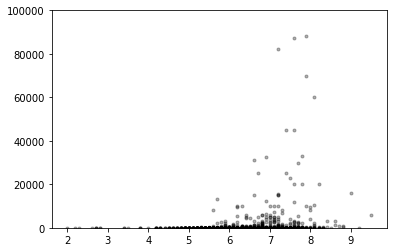

In [384]:
top=10**w.value #set vertical scale

# All data collectively
plt.scatter(xm,yd,marker='.',alpha=0.3,color='black')
plt.ylim(0,top)
plt.show()

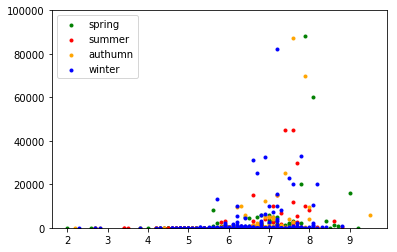

In [385]:
# split the scatter by season

top=10**w.value #set vertical scale

eq_spr=eq_sd_D[eq_sd_D['Season']=='spring']
eq_smr=eq_sd_D[eq_sd_D['Season']=='summer']
eq_aut=eq_sd_D[eq_sd_D['Season']=='authumn']
eq_wnt=eq_sd_D[eq_sd_D['Season']=='winter']

x_spr=eq_spr['magnitude']
y_spr=eq_spr['deaths']

x_smr=eq_smr['magnitude']
y_smr=eq_smr['deaths']

x_aut=eq_aut['magnitude']
y_aut=eq_aut['deaths']

x_wnt=eq_wnt['magnitude']
y_wnt=eq_wnt['deaths']

plt.scatter(x_spr,y_spr,marker='.',color='green',label='spring')
plt.scatter(x_smr,y_smr,marker='.',color='red',label='summer')
plt.scatter(x_aut,y_aut,marker='.',color='orange',label='authumn')
plt.scatter(x_wnt,y_wnt,marker='.',color='blue',label='winter')

plt.legend()
plt.ylim(0,top)
plt.show()

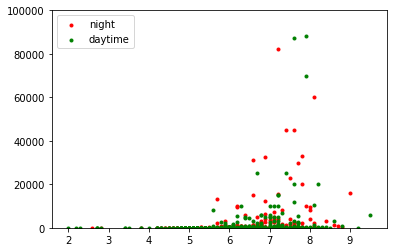

In [386]:
# split the scatter by daytime

top=10**w.value #set vertical scale

eq_slp=eq_sd_D[eq_sd_D['sleep']==True]
eq_wak=eq_sd_D[eq_sd_D['sleep']==False]

x_slp=eq_slp['magnitude']
y_slp=eq_slp['deaths']

x_wak=eq_wak['magnitude']
y_wak=eq_wak['deaths']

plt.scatter(x_slp,y_slp,marker='.',color='red',label='night')
plt.scatter(x_wak,y_wak,marker='.',color='green',label='daytime')

plt.legend()
plt.ylim(0,top)
plt.show()

In [387]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [388]:
# Pivot average death over sleep time and strength/mag

eq_g_sp=eq_sd_D.groupby(by=['sleep','Class'],as_index=False).mean()
eq_sp_pvt=eq_g_sp.pivot(index='sleep',columns='Class',values='deaths').fillna(0)
eq_spdth=eq_sp_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_spdth

Class,Minor,Light,Moderate,Strong,Great
sleep,,,,,
False,2.916667,7.333333,91.564593,393.579137,10749.000000
True,4.000000,3.681818,182.694030,813.119048,19211.571429


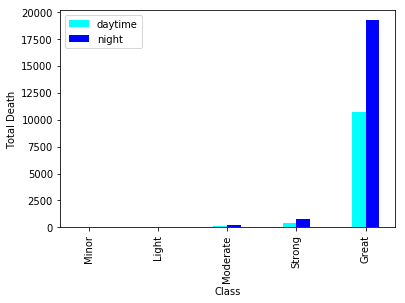

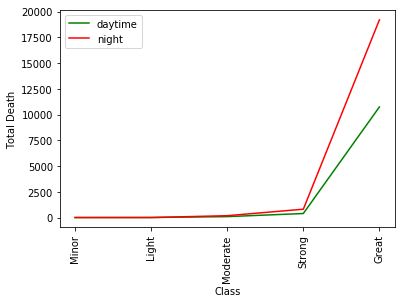

In [389]:
x=np.arange(0,eq_spdth.shape[1])

wdt=.2
y0=np.array(eq_spdth.iloc[0,:])
y1=np.array(eq_spdth.iloc[1,:])

b0=plt.bar(x-0.1,y0,0.2,color='cyan',label='daytime') 
b1=plt.bar(x+0.1,y1,0.2,color='blue',label='night') #spring

plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)
plt.xlabel('Class')
plt.ylabel('Total Death')

plt.legend()
plt.show()


p0=plt.plot(x,y0,color='green',label='daytime')
p1=plt.plot(x,y1,color='red',label='night')
plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)
plt.xlabel('Class')
plt.ylabel('Total Death')


plt.legend()
plt.show()

In [390]:
# Pivot total death over sleep time and strength/mag

eq_g_sp=eq_sd_n0.groupby(by=['sleep','Class'],as_index=False).mean()
eq_sp_pvt=eq_g_sp.pivot(index='sleep',columns='Class',values='shaking_death').fillna(0)
eq_spdth=eq_sp_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_spdth

Class,Minor,Light,Moderate,Strong,Great
sleep,,,,,
False,0.0,1.486486,25.313253,405.859060,82.5
True,2.0,2.380952,47.318182,590.421488,1901.0


In [391]:
# Pivot average death over season and strength/mag

eq_g_sn = eq_sd_D.groupby(by=['Season','Class'],as_index=False).mean()
eq_sn_pvt=eq_g_sn.pivot(index='Season',columns='Class',values='deaths').fillna(0)
eq_sndth=eq_sn_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_sndth2=eq_sndth.reindex_axis(['spring','summer','authumn','winter','unknown'],axis=0)

eq_sndth2=eq_sndth2.drop('unknown',0)
eq_sndth2

Class,Minor,Light,Moderate,Strong,Great
Season,,,,,
spring,3.250000,12.105263,180.216867,268.641379,5837.071429
summer,3.750000,3.500000,75.724490,287.495652,1521.500000
authumn,1.666667,3.000000,19.868132,549.546296,2455.375000
winter,3.500000,3.066667,277.442857,1289.428571,35574.625000


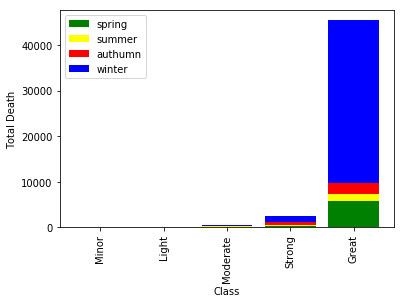

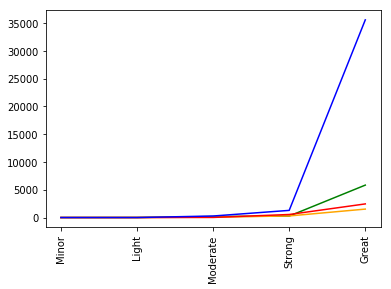

In [392]:
x=np.arange(0,eq_sndth.shape[1])

y0=np.array(eq_sndth.loc['spring',:])
y1=np.array(eq_sndth.loc['summer',:])
y2=np.array(eq_sndth.loc['authumn',:])
y3=np.array(eq_sndth.loc['winter',:])

b0=plt.bar(x,y0,color='green',label='spring') 
b1=plt.bar(x,y1,bottom=y0,color='yellow',label='summer')
b2=plt.bar(x,y2,bottom=y0+y1,color='red',label='authumn')
b3=plt.bar(x,y3,bottom=y0+y1+y2,color='blue',label='winter')



plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)
plt.xlabel('Class')
plt.ylabel('Total Death')

plt.legend()
plt.show()

p0=plt.plot(x,y0,color='green',label='spring')
p1=plt.plot(x,y1,color='orange',label='summer')
p2=plt.plot(x,y2,color='red',label='authumn')
p3=plt.plot(x,y3,color='blue',label='winter')
plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)


plt.show()

In [393]:
eq_g_dc=eq_sd_n0.groupby(by=['country','decade'],as_index=False).sum()
eq_g_dc.head()

,country,decade,lat,long,magnitude,shaking_death,deaths,year,month,hour,sleep,year5,death_ratio
0,,1990,10.450,-63.532,6.9,81.0,81.0,1997,7,14.0,0.0,1995,1.000000
1,Afghanistan,1970,102.770,203.676,17.8,61.0,62.0,5926,12,42.0,1.0,5920,2.980000
2,Afghanistan,1980,215.915,419.589,39.3,487.0,537.0,11899,41,68.0,3.0,11885,5.900000
3,Afghanistan,1990,289.590,563.490,48.8,6411.0,7154.0,15968,45,106.0,1.0,15950,6.851064
4,Afghanistan,2000,321.913,631.467,54.5,1083.0,1233.0,18023,49,91.0,3.0,18005,8.096386


In [394]:
ctys=np.array(eq_g_dc['country'].drop_duplicates(keep='first'))

In [395]:
cty_dp= widgets.Dropdown(
    options=ctys,
    description='Countries:',
    disabled=False,
)
cty_dp

A Jupyter Widget

In [396]:
eq_dc_pvt=eq_g_dc.pivot(index='country',columns='decade',values='deaths').fillna(0)


In [397]:
# x=ctys
# y=np.array(eq_dc_pvt.loc[cty_dp.value,:])
# b=plt.bar(x,y) 


# time trend for five countries

In [398]:
eq_cn=eq_sd_D[eq_sd_D['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]
eq_g_cn=eq_cn.groupby(by=['country','decade'],as_index=False).sum().drop(['lat','long','magnitude','shaking_death','year','month','hour','sleep','year5'],1)
eq_g_cn

eq_cn_pvt2=eq_g_cn.pivot(index='country',columns='decade',values='deaths').fillna(0)
eq_cn_pvt2


decade,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
country,,,,,,,,,,,,
China,6519.0,13364.0,446572.0,21791.0,2206.0,4093.0,11534.0,684890.0,1142.0,850.0,88723.0,2698.0
Japan,55.0,163.0,146400.0,3662.0,11792.0,46.0,99.0,108.0,148.0,6683.0,98.0,15894.0
Pakistan,231.0,0.0,0.0,60200.0,4000.0,0.0,2.0,5400.0,256.0,132.0,87631.0,0.0
Peru,0.0,150.0,39.0,0.0,1921.0,155.0,454.0,70291.0,57.0,310.0,677.0,0.0
Turkey,4652.0,6836.0,634.0,33328.0,14201.0,1957.0,2923.0,9621.0,1427.0,46810.0,272.0,643.0


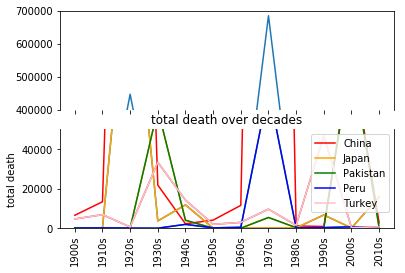

In [399]:
x=np.arange(0,eq_cn_pvt2.shape[1])

wdt=0.2
y0=np.array(eq_cn_pvt2.iloc[0,:])
y1=np.array(eq_cn_pvt2.iloc[1,:])
y2=np.array(eq_cn_pvt2.iloc[2,:])
y3=np.array(eq_cn_pvt2.iloc[3,:])
y4=np.array(eq_cn_pvt2.iloc[4,:])

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

ax1.plot(x,y0)
ax2.plot(x,y1)
ax2.plot(x,y2)
ax2.plot(x,y3)
ax2.plot(x,y4)

ax1.set_ylim(400000, 700000)  # outliers only
ax2.set_ylim(0, 50000)  # most of the data
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)


p0=plt.plot(x,y0,color='red',label='China')
p1=plt.plot(x,y1,color='orange',label='Japan')
p2=plt.plot(x,y2,color='green',label='Pakistan')
p3=plt.plot(x,y3,color='blue',label='Peru')
p4=plt.plot(x,y4,color='pink',label='Turkey')

plt.ylabel('total death')
# plt.ylim(0.5,1.1)
plt.xticks(x,['1900s','1910s','1920s','1930s','1940s','1950s','1960s','1970s','1980s','1990s','2000s','2010s'],rotation=90)
plt.title("total death over decades")

plt.legend(loc='upper right')
plt.show()

In [400]:
# f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
# ax.plot(eq_df_japan.origin,eq_df_japan.deaths)
# ax2.plot(eq_df_japan.origin,eq_df_japan.deaths)

# ax.set_ylim(120000, 150000)  # outliers only
# ax2.set_ylim(0, 20000)  # most of the data
# ax.spines[‘bottom’].set_visible(False)
# ax2.spines[‘top’].set_visible(False)
# ax.xaxis.tick_top()
# ax.tick_params(labeltop=‘off’)  # don’t put tick labels at the top
# ax2.xaxis.tick_bottom()

# d = .015  
# kwargs = dict(transform=ax.transAxes, color=‘k’, clip_on=False)
# ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

# kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
# ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)
# plt.show()

In [401]:
eq_cn=eq_sd_n0[eq_sd_n0['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]
# eq_cn=eq_sd_n0[eq_sd_n0['country']=='China']

eq_g_cn=eq_cn.groupby(by=['country','decade'],as_index=False).mean().drop(['lat','long','deaths','magnitude','shaking_death','year','month','hour','sleep','year5'],1)
eq_g_cn

eq_cn_pvt=eq_g_cn.pivot(index='country',columns='decade',values='death_ratio').fillna(0)
eq_cn_pvt

decade,1960,1970,1980,1990,2000
country,,,,,
China,1.000000,0.988095,0.714134,0.759463,0.879912
Japan,0.000000,0.948000,0.779955,0.735691,0.698529
Pakistan,0.000000,1.000000,0.940000,1.000000,0.882966
Peru,0.906667,0.794643,1.000000,0.695471,0.760200
Turkey,0.931034,0.959152,0.993095,0.666679,0.800000


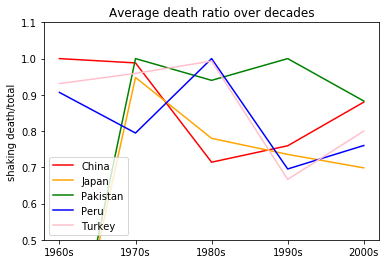

In [402]:
x=np.arange(0,eq_cn_pvt.shape[1])

wdt=0.2
y0=np.array(eq_cn_pvt.iloc[0,:])
y1=np.array(eq_cn_pvt.iloc[1,:])
y2=np.array(eq_cn_pvt.iloc[2,:])
y3=np.array(eq_cn_pvt.iloc[3,:])
y4=np.array(eq_cn_pvt.iloc[4,:])

p0=plt.plot(x,y0,color='red',label='China')
p1=plt.plot(x,y1,color='orange',label='Japan')
p2=plt.plot(x,y2,color='green',label='Pakistan')
p3=plt.plot(x,y3,color='blue',label='Peru')
p4=plt.plot(x,y4,color='pink',label='Turkey')

plt.ylabel('shaking death/total')
plt.ylim(0.5,1.1)
plt.xticks(x,['1960s','1970s','1980s','1990s','2000s'])
plt.title("Average death ratio over decades")

plt.legend()
plt.show()

# The demography information is genered [START]

##### Here I import countries' GDP and population density
GDP is available for every year, while population density is updated every 5 years.

In [403]:
# GDP info import

gdp_raw=pd.read_csv("UNdata_Export_20171206_031524973.csv",nrows=10204) #read spreadsheet
gdp_trim = gdp_raw.drop('Value Footnotes',1) #clean extra columns
gdp_trim.columns = ['country' , 'year' ,'GDP'] #rename columns
gdp_trim['country']=gdp_trim['country'].str.strip() # remove spaces

# grouping date by decades
gdp_trim['decade']=10*(gdp_trim['year']//10)
gdp_trim['GDP billion']=gdp_trim['GDP']/1000000000

In [404]:
#select countries
gdp_cn=gdp_trim[gdp_trim['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]

#group by decade
gdp_cn=gdp_cn.groupby(by=['country','decade'],as_index=False).mean().drop(['year'],1)
gdp_cn

#pivot
gdp_cn_pvt=gdp_cn.pivot(index='country',columns='decade',values='GDP billion').fillna(0)
gdp_cn_pvt



decade,1960,1970,1980,1990,2000,2010
country,,,,,,
China,63.094384,139.163050,260.891587,683.625730,2573.040427,8783.645355
Japan,94.895162,548.736408,1787.128495,4247.016913,4499.991211,5165.539021
Pakistan,5.814385,12.236880,31.739927,54.902591,113.717397,226.718716
Peru,4.511047,12.231291,18.200109,43.922850,79.048118,184.794633
Turkey,13.117285,42.423073,75.417574,182.985788,439.620544,772.507740


In [405]:
# #This block shows the name mismatches
# eq_xclud = eq_sd[~eq_sd['country'].isin(gdp_trim['country'])].dropna()
# eq_xclud.drop_duplicates(keep='first',subset='country').sort_values(by='country').drop(['origin', 'lat', 'long', 'magnitude', 'shaking_death',
#        'deaths', 'year', 'month', 'decade', 'hour', 'Season', 'sleep',
#        'strength'],1)

In [406]:
# GDP info import

gdpca_raw=pd.read_csv("GDP per capita_20171216_194626732.csv",nrows=9235) #read spreadsheet
gdpca_trim = gdpca_raw.drop('Item',1) #clean extra columns
gdpca_trim.columns = ['country' , 'year' ,'GDP'] #rename columns

# grouping date by decades
gdpca_trim['decade']=10*(gdp_trim['year']//10)

gdpca_trim.tail()


# gdp_trim['country']=gdp_trim['country'].str.strip() # remove spaces

# # grouping date by decades
# gdp_trim['decade']=10*(gdp_trim['year']//10)
# gdp_trim['GDP billion']=gdp_trim['GDP']/1000000000

,country,year,GDP,decade
9229,Zimbabwe,1974,716.246743,1980
9230,Zimbabwe,1973,615.817137,1980
9231,Zimbabwe,1972,518.197928,1980
9232,Zimbabwe,1971,434.259540,1980
9233,Zimbabwe,1970,388.472837,1980


In [407]:
#select countries
gdpca_cn=gdpca_trim[gdpca_trim['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]

#group by decade
gdpca_cn=gdpca_cn.groupby(by=['country','decade'],as_index=False).mean().drop(['year'],1)
gdpca_cn

#pivot
gdpca_cn_pvt=gdpca_cn.pivot(index='country',columns='decade',values='GDP').fillna(0)
gdpca_cn_pvt


decade,1960,1970,1980,1990,2000,2010
country,,,,,,
China,6549.944777,0.000000,252.045649,375.876706,973.341279,1456.702486
Japan,22097.685073,36670.332260,38809.112822,48790.481790,12846.928532,9998.374550
Pakistan,0.000000,197.989462,393.036235,803.495602,634.851084,939.261711
Peru,0.000000,643.045364,1872.717243,1776.756431,2437.377148,5356.125910
Turkey,3904.355211,7782.309159,10191.161424,1005.158788,2020.390020,2804.035495


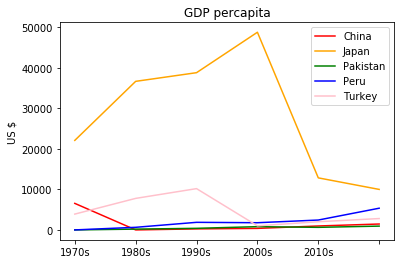

In [408]:
# GDP per capita

x=np.arange(0,gdpca_cn_pvt.shape[1])

y0=np.array(gdpca_cn_pvt.loc['China',:])
y1=np.array(gdpca_cn_pvt.loc['Japan',:])
y2=np.array(gdpca_cn_pvt.loc['Pakistan',:])
y3=np.array(gdpca_cn_pvt.loc['Peru',:])
y4=np.array(gdpca_cn_pvt.loc['Turkey',:])


b0=plt.plot(x,y0,color='red',label='China') 
b1=plt.plot(x,y1,color='orange',label='Japan')
b2=plt.plot(x,y2,color='green',label='Pakistan')
b3=plt.plot(x,y3,color='blue',label='Peru')
b4=plt.plot(x,y4,color='pink',label='Turkey')



plt.xticks(x,['1970s','1980s','1990s','2000s','2010s'])
plt.ylabel('US $')
plt.title('GDP percapita')
plt.legend()
plt.show()


In [409]:
# # The following name corrections are made based on the above finding

# def cty_ren(old, new):
#     gdp_trim['country'] = gdp_trim['country'].str.replace(old, new)
# cty_ren('Myanmar','Burma')
# cty_ren('Congo, Dem. Rep.','Democratic Republic of the Congo')
# cty_ren('Congo, Rep.','Democratic Republic of the Congo')
# cty_ren('Egypt, Arab Rep.','Egypt')
# cty_ren('Iran, Islamic Rep.','Iran')
# cty_ren('Kyrgyz Republic','Kyrgyzstan')
# cty_ren('Venezuela, RB','Venezuela')
# cty_ren('Serbia','Yugoslavia')
# cty_ren('Yemen, Rep.','Yemen')
# gdp_trim['country']=gdp_trim['country'].str.strip()




In [410]:
#Population density import

dens_raw=pd.read_excel("PopulationDensity-20171209125642.xlsx",sheetname='Data',nrows=275,skiprows=1) #read spreadsheet
dens_trim=dens_raw.drop(['ISO 3166-1 numeric code','Note'],1) #remove columns
dens_trim.set_index('Location') #column rename
dens_melt=pd.melt(dens_trim,id_vars=['Location']) #melt column

In [411]:
# cleaning the melted data - density
dens_melt.columns=['country','year5','density']
dens_melt['country']=dens_melt['country'].str.strip() #remove spaces from country name

In [412]:
# grouping date by decades
dens_melt['decade']=10*(dens_melt['year5']//10)

#select countries
dens_cn=dens_melt[dens_melt['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]

#group by decade
dens_cn=dens_cn.groupby(by=['country','decade'],as_index=False).mean()

#pivot
dens_cn_pvt=dens_cn.pivot(index='country',columns='decade',values='density').fillna(0)
dens_cn_pvt

decade,1950,1960,1970,1980,1990,2000,2010
country,,,,,,,
China,62.10,73.55,93.00,110.00,128.50,138.75,144.8
Japan,235.65,263.50,298.10,328.80,344.15,350.90,352.6
Pakistan,50.55,62.15,81.00,110.45,149.50,189.70,221.3
Peru,6.45,8.50,11.15,14.45,17.95,20.90,22.9
Turkey,29.65,37.95,48.15,60.45,73.05,85.20,94.0


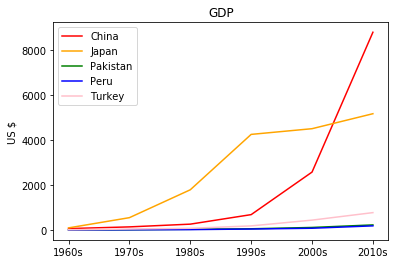

In [413]:
# GDP

x=np.arange(0,gdp_cn_pvt.shape[1])

y0=np.array(gdp_cn_pvt.loc['China',:])
y1=np.array(gdp_cn_pvt.loc['Japan',:])
y2=np.array(gdp_cn_pvt.loc['Pakistan',:])
y3=np.array(gdp_cn_pvt.loc['Peru',:])
y4=np.array(gdp_cn_pvt.loc['Turkey',:])


b0=plt.plot(x,y0,color='red',label='China') 
b1=plt.plot(x,y1,color='orange',label='Japan')
b2=plt.plot(x,y2,color='green',label='Pakistan')
b3=plt.plot(x,y3,color='blue',label='Peru')
b4=plt.plot(x,y4,color='pink',label='Turkey')



plt.xticks(x,['1960s','1970s','1980s','1990s','2000s','2010s'])
plt.ylabel('US $')
plt.title('GDP')
plt.legend()
plt.show()

# p0=plt.plot(x,y0,color='green',label='spring')
# p1=plt.plot(x,y1,color='orange',label='summer')
# p2=plt.plot(x,y2,color='red',label='authumn')
# p3=plt.plot(x,y3,color='blue',label='winter')
# plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)


# plt.show()

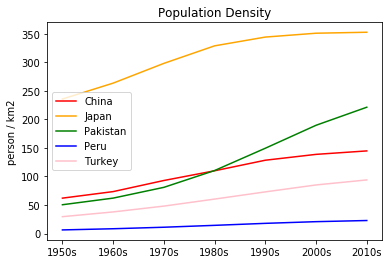

In [414]:
# Population Density

x=np.arange(0,dens_cn_pvt.shape[1])

y0=np.array(dens_cn_pvt.loc['China',:])
y1=np.array(dens_cn_pvt.loc['Japan',:])
y2=np.array(dens_cn_pvt.loc['Pakistan',:])
y3=np.array(dens_cn_pvt.loc['Peru',:])
y4=np.array(dens_cn_pvt.loc['Turkey',:])


b0=plt.plot(x,y0,color='red',label='China') 
b1=plt.plot(x,y1,color='orange',label='Japan')
b2=plt.plot(x,y2,color='green',label='Pakistan')
b3=plt.plot(x,y3,color='blue',label='Peru')
b4=plt.plot(x,y4,color='pink',label='Turkey')



plt.xticks(x,['1950s','1960s','1970s','1980s','1990s','2000s','2010s'])
plt.title('Population Density')
plt.ylabel('person / km2')

plt.legend()
plt.show()


In [415]:
# # find the countries that names appear differently on different sources -density
# un_xclud = eq_sd[~eq_sd['country'].isin(dens_melt['country'])].dropna()
# un_xclud.drop_duplicates(keep='first', subset='country').sort_values(by='country').drop(['origin', 'lat', 'long', 'magnitude', 'shaking_death',
#        'deaths', 'year', 'month', 'decade', 'hour', 'Season', 'sleep',
#        'strength'],1)

In [416]:
# def un_ren(old, new):
#     dens_melt['country'] = dens_melt['country'].str.replace(old, new)
# un_ren('Myanmar','Burma')
# un_ren('Bolivia (Plurinational State of)','Bolivia')
# un_ren('Czechia','Czech Republic')
# un_ren('United Republic of Tanzania','Tanzania')
# un_ren('Iran (Islamic Republic of)','Iran')
# un_ren('China, Taiwan Province of China','Taiwan')
# un_ren('Venezuela (Bolivarian Republic of)','Venezuela')
# un_ren('United States of America','United States')
# un_ren('Viet Nam','Vietnam')
# un_ren('Wallis and Futuna Islands','Wallis and Futuna')
# un_ren('Serbia','Yugoslavia')

# dens_melt['country']=dens_melt['country'].str.strip()

# The demography information is genered [END]

In [417]:
eq_ir=eq_sd_n0[eq_sd_n0['country']=="Iran"]
eq_ir.head(3)

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class,year5,death_ratio
474,1968-09-01 07:27,Iran,34.072,58.212,6.3,2000.0,10000.0,1968,9,1960,10.0,authumn,False,Strong,1965,0.200000
501,1970-07-30 00:52,Iran,37.836,55.887,6.6,176.0,220.0,1970,7,1970,3.0,summer,True,Strong,1970,0.800000
523,1972-04-10 02:06,Iran,28.408,52.789,6.7,5054.0,5057.0,1972,4,1970,5.0,spring,True,Strong,1970,0.999407


In [418]:
eq_ir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 474 to 1273
Data columns (total 16 columns):
origin           62 non-null object
country          62 non-null object
lat              62 non-null float64
long             62 non-null float64
magnitude        62 non-null float64
shaking_death    62 non-null float64
deaths           62 non-null float64
year             62 non-null int64
month            62 non-null int64
decade           62 non-null int64
hour             62 non-null float64
Season           62 non-null object
sleep            62 non-null bool
Class            62 non-null object
year5            62 non-null int64
death_ratio      62 non-null float64
dtypes: bool(1), float64(7), int64(4), object(4)
memory usage: 7.8+ KB


# Metrics added
##### Year, month, hour: extracted by slicing the 'oringin' column.
##### Decade: Calculated from the year | Q: How the casaulties trend over time? (worldwide/within countries)
##### Season: deducted from the month, flipped for southern hemisphere (negative latitude) | Q: Do weather condition impact casaulties?
##### Sleep: deducted by hour (UTC converted to local time using longitude) | Q: how different are casaulties in day/night?
##### Strength: Grouping quakes by magnitude (over 8 and below 4 are grouped)
##### To be added: GDP and population density

1. Pivot total death in sleeping time vs regular hours
2. Pivot total death over season
3. plot the ratio of shaking death to total vs GDP (are wealthier countries prepared better?)
4. plot population density over death

## The section below is added last minute before presenting

In [435]:
eq_sd_cn=eq_sd[eq_sd['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])]
eq_sd_cn.head(3)

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class,year5
1,1900-05-11 17:23,Japan,38.7,141.1,7.0,NaN,NaN,1900,5,1900,2.0,spring,True,Major,1900
2,1900-07-12 06:25,Turkey,40.3,43.1,5.9,NaN,140.0,1900,7,1900,8.0,summer,False,Moderate,1900
4,1901-02-15 00:00,China,26.0,100.1,6.5,NaN,NaN,1901,2,1900,6.0,winter,True,Strong,1900


In [436]:
dens2_cn=dens_melt[dens_melt['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])].drop(['decade'],1)
dens2_cn.head(3)

,country,year5,density
78,China,1950,59.1
83,Japan,1950,227.1
101,Pakistan,1950,48.7


In [437]:
gdpca2_cn=gdpca_trim[gdpca_trim['country'].isin(['China','Japan','Pakistan', 'Peru', 'Turkey'])].drop(['decade'],1)
gdpca2_cn.head(3)

,country,year,GDP
1852,China,2015,8109.055067
1853,China,2014,7692.604224
1854,China,2013,7071.504379


In [438]:
merge1=pd.merge(eq_sd_cn,dens2_cn,how='left',on=['country','year5'])

In [531]:
merge2=pd.merge(merge1,gdpca2_cn,how='left',on=['country','year'])
merge2.to_csv('mergedCSV.csv')

In [470]:
# extra columns removed

merge_cn=merge2[merge2['country']=='China'].drop(['origin' ,'lat' ,'long' ,'magnitude' ,'shaking_death' ,'year' ,'month' ,'decade' ,'hour' ,'Season' ,'sleep' ,'Class' ,'year5'],1)
merge_jp=merge2[merge2['country']=='Japan'].drop(['origin' ,'lat' ,'long' ,'magnitude' ,'shaking_death' ,'year' ,'month' ,'decade' ,'hour' ,'Season' ,'sleep' ,'Class' ,'year5'],1)
merge_pk=merge2[merge2['country']=='Pakistan'].drop(['origin' ,'lat' ,'long' ,'magnitude' ,'shaking_death' ,'year' ,'month' ,'decade' ,'hour' ,'Season' ,'sleep' ,'Class' ,'year5'],1)
merge_tk=merge2[merge2['country']=='Turkey'].drop(['origin' ,'lat' ,'long' ,'magnitude' ,'shaking_death' ,'year' ,'month' ,'decade' ,'hour' ,'Season' ,'sleep' ,'Class' ,'year5'],1)
merge_pe=merge2[merge2['country']=='Peru'].drop(['origin' ,'lat' ,'long' ,'magnitude' ,'shaking_death' ,'year' ,'month' ,'decade' ,'hour' ,'Season' ,'sleep' ,'Class' ,'year5'],1)

# data with NaN values removed
merge_cn=merge_cn.query('GDP != "NaN"')
merge_jp=merge_jp.query('GDP != "NaN"')
merge_pk=merge_pk.query('GDP != "NaN"')
merge_tk=merge_tk.query('GDP != "NaN"')
merge_pe=merge_pe.query('GDP != "NaN"')

merge_cn=merge_cn.query('density != "NaN"')
merge_jp=merge_jp.query('density != "NaN"')
merge_pk=merge_pk.query('density != "NaN"')
merge_tk=merge_tk.query('density != "NaN"')
merge_pe=merge_pe.query('density != "NaN"')

#### Each dot represents an earthquake.
#### The coordinates are death for the earthquake and the GDP | population density at the time of incident
#### Color coded for country

In [524]:
# These widgets help zoom in/out the plots

v_sl=widgets.IntSlider(
    min=1,
    max=7,
    step=1,
    description='death:',
    disabled=False,
    continuous_update=True,
    orientation='vertical',
    readout=True,
    readout_format='d'
)

h_sl=widgets.IntSlider(
    min=1,
    max=7,
    step=1,
    description='GDP/cap:',
    disabled=False,
    continuous_update=True,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

In [525]:
v_sl

A Jupyter Widget

In [526]:
h_sl

A Jupyter Widget

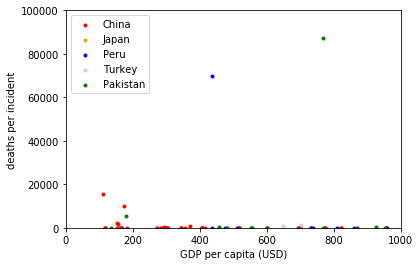

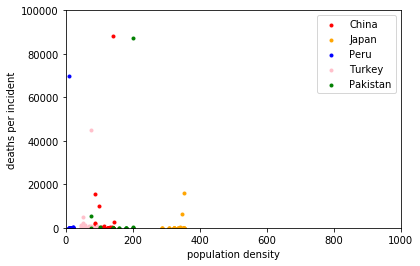

In [533]:
top_v=10**v_sl.value
top_h=1000*h_sl.value

#GDP per capita

x_cn=merge_cn['GDP']
y_cn=merge_cn['deaths']

x_jp=merge_jp['GDP']
y_jp=merge_jp['deaths']

x_pk=merge_pk['GDP']
y_pk=merge_pk['deaths']

x_pe=merge_pe['GDP']
y_pe=merge_pe['deaths']

x_tk=merge_tk['GDP']
y_tk=merge_tk['deaths']

plt.scatter(x_cn,y_cn,marker='.',color='red',label='China')
plt.scatter(x_jp,y_jp,marker='.',color='orange',label='Japan')
plt.scatter(x_pe,y_pe,marker='.',color='blue',label='Peru')
plt.scatter(x_tk,y_tk,marker='.',color='pink',label='Turkey')
plt.scatter(x_pk,y_pk,marker='.',color='green',label='Pakistan')

plt.xlim(0,top_h)
plt.ylim(0,top_v)
plt.xlabel('GDP per capita (USD)')
plt.ylabel('deaths per incident')
plt.legend()

plt.show()

#population density

x_cn=merge_cn['density']
y_cn=merge_cn['deaths']

x_jp=merge_jp['density']
y_jp=merge_jp['deaths']

x_pk=merge_pk['density']
y_pk=merge_pk['deaths']

x_pe=merge_pe['density']
y_pe=merge_pe['deaths']

x_tk=merge_tk['density']
y_tk=merge_tk['deaths']

plt.scatter(x_cn,y_cn,marker='.',color='red',label='China')
plt.scatter(x_jp,y_jp,marker='.',color='orange',label='Japan')
plt.scatter(x_pe,y_pe,marker='.',color='blue',label='Peru')
plt.scatter(x_tk,y_tk,marker='.',color='pink',label='Turkey')
plt.scatter(x_pk,y_pk,marker='.',color='green',label='Pakistan')

plt.xlim(0,top_h)
plt.ylim(0,top_v)
plt.xlabel('population density')
plt.ylabel('deaths per incident')
plt.legend()

plt.show()

